In [1]:
import sys
import os
import math
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import DataTransformer
from src.visualization.visualize import seaborn_style
from src.visualization.colors import purples

seaborn_style(purples["0"])

In [2]:
transformer = DataTransformer()
listen_history = transformer.get_data()
listen_history.head()

,title,subtitles,time,artist,date,month
0,right where you left me (bonus track),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:43:04.189000+00:00,Taylor Swift,2023-08-04,2023-08-01
1,Last Kiss (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:36:53.707000+00:00,Taylor Swift,2023-08-04,2023-08-01
2,Love Story (Taylor’s Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:32:56.779000+00:00,Taylor Swift,2023-08-04,2023-08-01
3,Mine (Taylor's Version),"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:29:04.570000+00:00,Taylor Swift,2023-08-04,2023-08-01
4,Snow On The Beach,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-08-04 16:24:48.046000+00:00,Taylor Swift,2023-08-04,2023-08-01


In [3]:
def artist_share_by_month(n_months):
    n_months_of_data_grouped = (
        transformer.data_for_timeframe(listen_history, n_months)
            .groupby(['month', 'artist'])
            .size()
            .reset_index(name='count')
    )

    n_months_of_data_grouped['percentage'] = n_months_of_data_grouped['count'] / n_months_of_data_grouped.groupby('month')['count'].transform('sum') * 100
    artist_share_by_month = (
        n_months_of_data_grouped[['month', 'artist', 'percentage']]
        .groupby(['month', 'artist'])
        .sum()
        .reset_index()
        .pivot(index='month', columns='artist', values='percentage').fillna(0)
        .reset_index()
    )
    artist_share_by_month.set_index('month', inplace=True)
    return artist_share_by_month

artist_share_by_month(12).tail()

artist,A Great Big World,AURORA,AViVA,Adele,Agnes Obel,AgtfCZ,Agunda,Aida Garifullina,Alan Azte,Aleksandr Donskikh,...,Ólafur Arnalds,Воплі Відоплясова,Генеральний штаб ЗСУ,Наталия Фаустова,Новелла Матвеева,りょうたRyouta,ガルナ(オワタP),夢の流れ,浜口 史郎,賽河原幸之助.
month,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0.000000,0.000000,0.254453,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.508906,0.0,0.0,1.781170,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-01,0.000000,1.049869,0.000000,0.262467,0.262467,0.0,0.262467,0.0,0.0,0.0,...,0.787402,0.0,0.0,2.362205,0.0,0.0,0.0,0.0,0.0,0.0
2023-06-01,0.186567,0.932836,0.186567,0.186567,0.373134,0.0,0.186567,0.0,0.0,0.0,...,0.559701,0.0,0.0,1.305970,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-01,0.222222,1.333333,0.222222,0.222222,0.222222,0.0,0.000000,0.0,0.0,0.0,...,0.222222,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def plot_for_artist(df, artist, n_months):
    col = df.pop(artist)
    df.insert(0, col.name, col)
    
    grays = ['0.6', '0.7', '0.8', '0.9']
    colors = [purples["5"]] + grays * math.ceil((len(df.columns) - 1)/len(grays))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.stackplot(df.index, df.T, labels=df.columns, alpha=0.7, colors=colors, linewidth=0)

    ax.set_title(f'Ratio of {artist} Listens vs. Other Artist Listens Each Month Over {n_months} Months')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Month')
    ax.legend([artist, 'Other'])
    ax.margins(x=0, y=0)

    plt.show()
    fig.savefig(f"../reports/figures/artists/ratio_of_{artist.lower().replace(' ', '_')}_listens_over_{n_months}_months.png")

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_8879/718208330.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


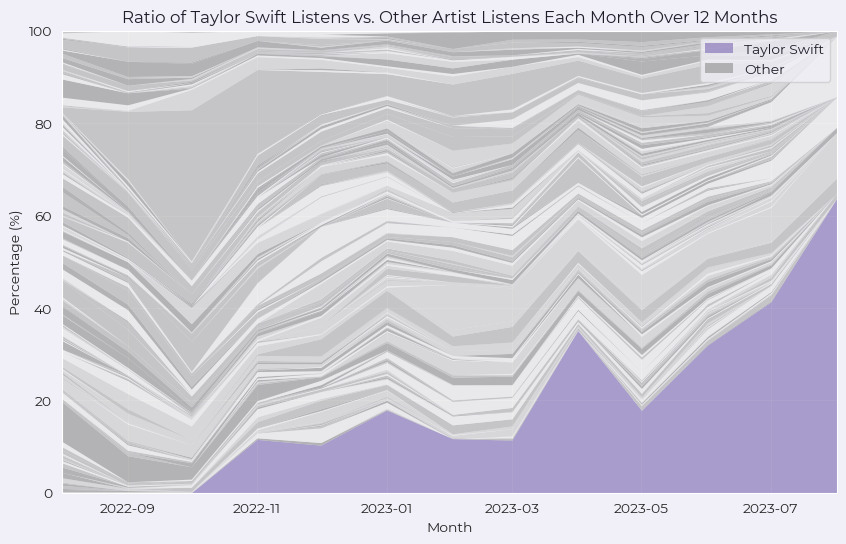

In [5]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Taylor Swift', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_8879/718208330.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


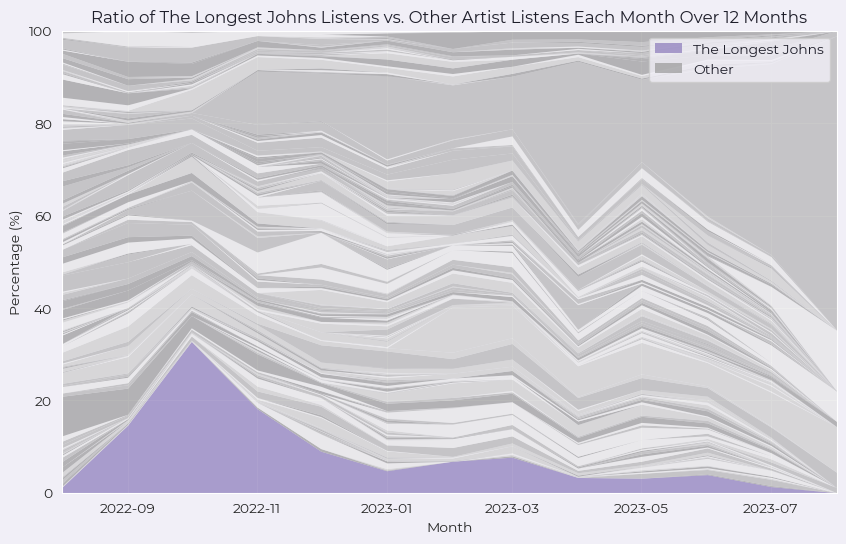

In [6]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'The Longest Johns', 12)

/var/folders/_k/2ptdf0mx30x7g5xgmyh1gqwr0000gn/T/ipykernel_8879/718208330.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, col.name, col)


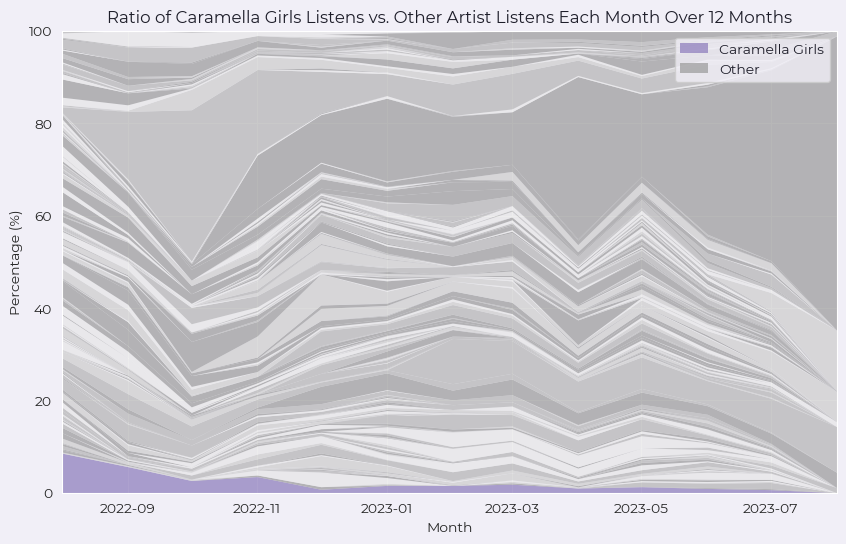

In [7]:
artist_share_over_12_months = artist_share_by_month(12)
plot_for_artist(artist_share_over_12_months, 'Caramella Girls', 12)